In [85]:
## importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string 

In [86]:
# reading the data
data = pd.read_csv('ecommerceDataset.csv')

In [87]:
data.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


Clearly, column names are wrong so we need to fix it. Below code will do it for us

In [88]:
data = data.T.reset_index().T.reset_index(drop=True) 
data.columns = ['category', 'description']

In [89]:
data

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [90]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
#5. Evaluation
#6. Improvement

## Data Cleaning

In [91]:
data.info() # one null value can remove that row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [92]:
category_map = {'Electronics':0,'Household':1,'Books':2,'Clothing & Accessories':3} 

In [93]:
data['category'] = data.category.map(category_map) # converting the text labels into numeric labels so that our model can understand

In [94]:
data.sample(5) # random 5 samples from the data i.e. 5 random rows got selected

,category,description
9924,1,Arka Home Products 100% Cotton Vegetable Stora...
36069,3,Dupatta Bazaar Woman's Net Dupatta with Embroi...
22428,2,Self Study Guide CLAT (Common Law Admission Te...
6892,1,Switchon Solid Mahroon colour table Napkins se...
3998,1,Where Borders Bleed: An Insider's Account of I...


In [95]:
#missing values
data.isnull().sum()

category       0
description    1
dtype: int64

In [96]:
# drop null value row
data.dropna(inplace=True)

In [97]:
data.shape

(50424, 2)

In [98]:
# check for duplicate values
data.duplicated().sum()

22622

In [99]:
#remove duplicates
data = data.drop_duplicates(keep = 'first')
data.shape

(27802, 2)

In [100]:
data = data.reset_index(drop = True)

In [101]:
data['category'].value_counts()

1    10564
2     6256
3     5674
0     5308
Name: category, dtype: int64

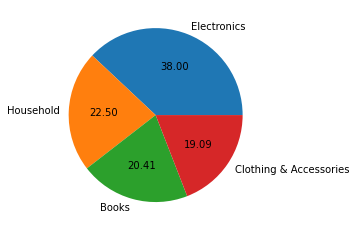

In [102]:
plt.pie(data['category'].value_counts(),labels = ['Electronics','Household','Books','Clothing & Accessories'],autopct = '%0.2f')
plt.show()

In [103]:
# data is imbalnced ----> precision will matter in this case

In [104]:
import nltk

In [105]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Text preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [106]:
def transform_text(text):
    text = text.lower()  ## lower case conversion
    text = nltk.word_tokenize(text)  ## list
    ## removing special caharacters
    y = []
    for i in text:
        if i.isalnum():  
            y.append(i)
    text = y[:]     # shallow copy of list y is now become our new text
    y.clear()
    
    ## removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [107]:
## stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('loving')

'love'

In [108]:
data['text'] = data['description'].apply(transform_text)

In [109]:
data.head()

,category,description,text
0,1,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design frame wall hang motiv offic...
1,1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf frame paint wood 30 inch x 10 inch special...
2,1,SAF 'UV Textured Modern Art Print Framed' Pain...,saf textur modern art print frame paint synthe...
3,1,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print frame paint synthet inch x 22...
4,1,Incredible Gifts India Wooden Happy Birthday U...,incred gift india wooden happi birthday uniqu ...


In [110]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,min_font_size = 10,background_color = 'white')

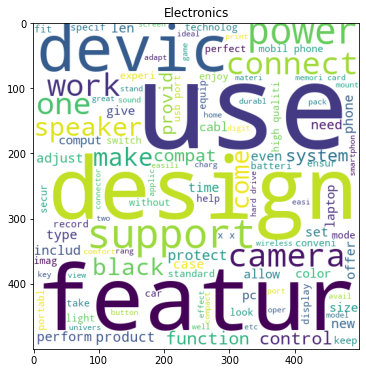

In [134]:
# word cloud for electronics category
elec_wc = wc.generate(data[data['category'] == 0]['text'].str.cat(sep = ' '))
plt.figure(figsize = (12,6))
plt.title('Electronics')
plt.imshow(elec_wc) 


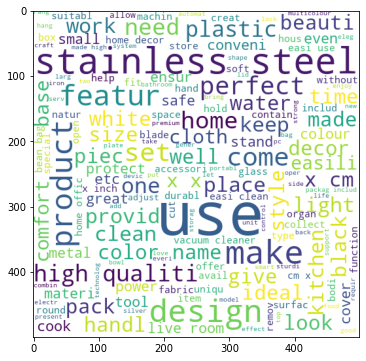

In [112]:
# word cloud for household category

house_wc = wc.generate(data[data['category'] == 1]['text'].str.cat(sep = ' '))
plt.figure(figsize = (12,6))
plt.imshow(house_wc)

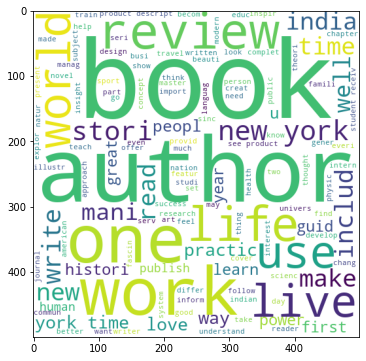

In [113]:
book_wc = wc.generate(data[data['category'] == 2]['text'].str.cat(sep = ' '))
plt.figure(figsize = (12,6))
plt.imshow(book_wc)

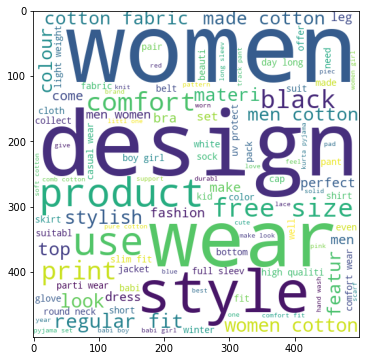

In [115]:
# clothing wordcloud
cloth_wc = wc.generate(data[data['category'] == 3]['text'].str.cat(sep = ' '))
plt.figure(figsize = (12,6))
plt.imshow(cloth_wc)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


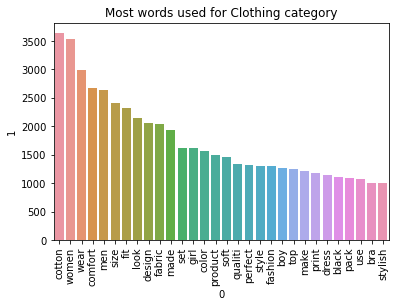

In [138]:
## let's find out the most common words used in each category to know more about the data
electronic_corpus = []
for description in data[data['category']==3]['text'].tolist():
    for word in description.split():
        electronic_corpus.append(word)
from collections import Counter
a =Counter(electronic_corpus).most_common(30)
a = pd.DataFrame(a)
sns.barplot(a[0],a[1])
plt.xticks(rotation='vertical')
plt.title('Most words used for Clothing category')
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


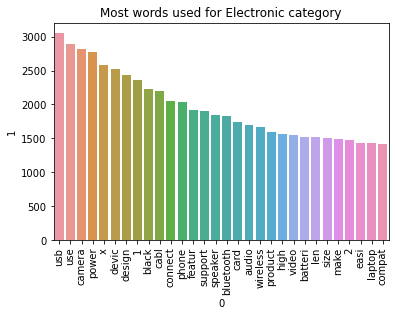

In [139]:
electronic_corpus = []
for description in data[data['category']==0]['text'].tolist():
    for word in description.split():
        electronic_corpus.append(word)
from collections import Counter
a =Counter(electronic_corpus).most_common(30)
a = pd.DataFrame(a)
sns.barplot(a[0],a[1])
plt.xticks(rotation='vertical')
plt.title('Most words used for Electronic category')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


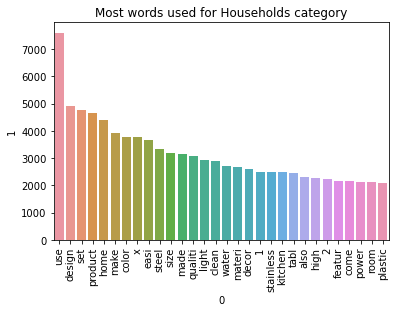

In [140]:
electronic_corpus = []
for description in data[data['category']==1]['text'].tolist():
    for word in description.split():
        electronic_corpus.append(word)
from collections import Counter
a =Counter(electronic_corpus).most_common(30)
a = pd.DataFrame(a)
sns.barplot(a[0],a[1])
plt.xticks(rotation='vertical')
plt.title('Most words used for Households category')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


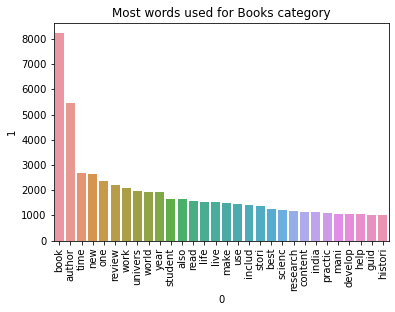

In [141]:
electronic_corpus = []
for description in data[data['category']==2]['text'].tolist():
    for word in description.split():
        electronic_corpus.append(word)
from collections import Counter
a =Counter(electronic_corpus).most_common(30)
a = pd.DataFrame(a)
sns.barplot(a[0],a[1])
plt.xticks(rotation='vertical')
plt.title('Most words used for Books category')
plt.show()

In [117]:
# Text Vectorization ----> we will convert the text into vectors so that our machine can understand
# using Bag of Words 
#  using tf-idf

In [118]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer(max_features = 3000) ---> didn't give great results
tfidf = TfidfVectorizer(max_features=4000)

In [119]:
X = tfidf.fit_transform(data['text']).toarray()


In [120]:
y = data['category'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [123]:
from sklearn import metrics
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))

0.8868908469699694
[[ 959   41   26   24]
 [ 177 1823   41  106]
 [  41   48 1097   73]
 [  12   35    5 1053]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1050
           1       0.94      0.85      0.89      2147
           2       0.94      0.87      0.90      1259
           3       0.84      0.95      0.89      1105

    accuracy                           0.89      5561
   macro avg       0.88      0.90      0.89      5561
weighted avg       0.89      0.89      0.89      5561



In [124]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

0.9316669663729545
[[ 944   82   21    3]
 [  58 2030   30   29]
 [  18   93 1130   18]
 [  10   15    3 1077]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1050
           1       0.91      0.95      0.93      2147
           2       0.95      0.90      0.93      1259
           3       0.96      0.97      0.97      1105

    accuracy                           0.93      5561
   macro avg       0.94      0.93      0.93      5561
weighted avg       0.93      0.93      0.93      5561



In [125]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

0.8518252112929329
[[ 866   66   23   95]
 [  77 1852   27  191]
 [  15   49  953  242]
 [   8   23    8 1066]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1050
           1       0.93      0.86      0.90      2147
           2       0.94      0.76      0.84      1259
           3       0.67      0.96      0.79      1105

    accuracy                           0.85      5561
   macro avg       0.86      0.85      0.85      5561
weighted avg       0.87      0.85      0.85      5561



We are getting maximum precision score for multinomial naive bayes upto now. Let's try for other algorithms as well.

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [127]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [128]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = metrics.classification_report(y_test,y_pred)
    print(accuracy)
    print(precision)


In [129]:
## support vector machine
train_classifier(svc,X_train,y_train,X_test,y_test)


0.9429958640532279
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1050
           1       0.93      0.95      0.94      2147
           2       0.93      0.94      0.94      1259
           3       0.97      0.97      0.97      1105

    accuracy                           0.94      5561
   macro avg       0.95      0.94      0.94      5561
weighted avg       0.94      0.94      0.94      5561



In [130]:
## KNN
train_classifier(knc,X_train,y_train,X_test,y_test)

0.6432296349577414
              precision    recall  f1-score   support

           0       0.95      0.46      0.62      1050
           1       0.96      0.53      0.69      2147
           2       0.39      0.98      0.56      1259
           3       0.99      0.65      0.78      1105

    accuracy                           0.64      5561
   macro avg       0.82      0.66      0.66      5561
weighted avg       0.84      0.64      0.66      5561



In [52]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

0.685488221542888
              precision    recall  f1-score   support

           0       0.91      0.39      0.55      1050
           1       0.56      0.96      0.71      2147
           2       0.95      0.48      0.64      1259
           3       0.93      0.67      0.77      1105

    accuracy                           0.69      5561
   macro avg       0.84      0.62      0.67      5561
weighted avg       0.79      0.69      0.68      5561



In [77]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

0.9395792123718756
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1050
           1       0.94      0.95      0.94      2147
           2       0.93      0.93      0.93      1259
           3       0.97      0.97      0.97      1105

    accuracy                           0.94      5561
   macro avg       0.94      0.94      0.94      5561
weighted avg       0.94      0.94      0.94      5561



In [78]:
## random forest
train_classifier(rfc,X_train,y_train,X_test,y_test)

0.9280704909188995
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1050
           1       0.91      0.94      0.93      2147
           2       0.93      0.93      0.93      1259
           3       0.96      0.97      0.96      1105

    accuracy                           0.93      5561
   macro avg       0.93      0.92      0.93      5561
weighted avg       0.93      0.93      0.93      5561



In [79]:
## adaboost
train_classifier(abc,X_train,y_train,X_test,y_test)

0.8021938500269735
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1050
           1       0.71      0.91      0.80      2147
           2       0.88      0.61      0.72      1259
           3       0.92      0.89      0.91      1105

    accuracy                           0.80      5561
   macro avg       0.84      0.78      0.80      5561
weighted avg       0.82      0.80      0.80      5561



In [80]:
train_classifier(bc,X_train,y_train,X_test,y_test)

0.9018162201042977
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1050
           1       0.88      0.91      0.90      2147
           2       0.91      0.91      0.91      1259
           3       0.95      0.94      0.94      1105

    accuracy                           0.90      5561
   macro avg       0.91      0.90      0.90      5561
weighted avg       0.90      0.90      0.90      5561



The top 2 best performing algorithms are:
1. Support Vector Machine

0.9429958640532279 # Accuracy though it's not a good measure here
              
              
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1050
           1       0.93      0.95      0.94      2147
           2       0.93      0.94      0.94      1259
           3       0.97      0.97      0.97      1105
2. Multinomial Naive Bayes

0.9316669663729545 # Accuracy
             
             
             precision    recall  f1-score   support

           0       0.92      0.90      0.91      1050
           1       0.91      0.95      0.93      2147
           2       0.95      0.90      0.93      1259
           3       0.96      0.97      0.97      1105